# Day 1 – OFDM Basics and Simulation

## What is OFDM?

Orthogonal Frequency-Division Multiplexing (OFDM) is a multi-carrier modulation technique used in 4G LTE, 5G NR, Wi-Fi, and Bluetooth. It divides the available bandwidth into multiple orthogonal subcarriers, each carrying a low-rate data stream.

### Key Concepts:
- **Orthogonality**: Subcarriers do not interfere due to mathematical orthogonality.
- **IFFT/FFT**: Used for modulation and demodulation.
- **Cyclic Prefix (CP)**: Prevents Inter-Symbol Interference (ISI) caused by multipath.
- **QAM Modulation**: Maps bits to complex symbols (16-QAM used here).
- **AWGN Channel**: Simulates real-world noise.

### Why OFDM?
- Spectrally efficient
- Robust against multipath fading
- Easy to implement in hardware

Mean error: 0.9814098442126384


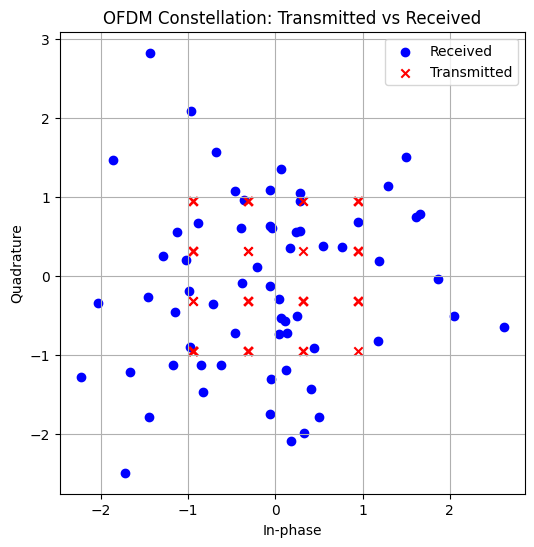

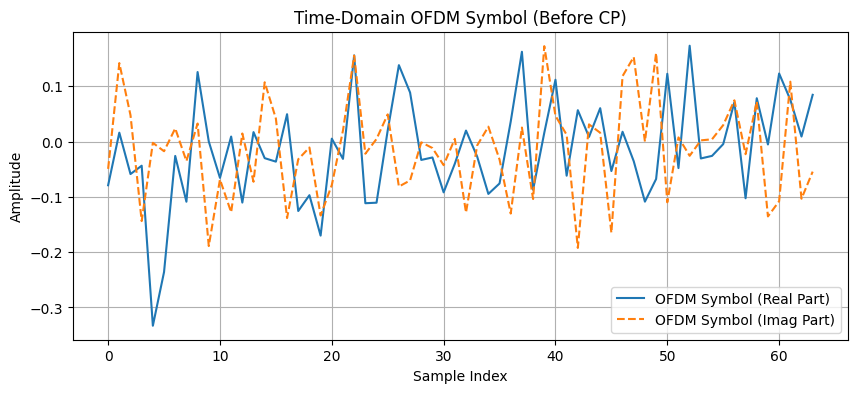

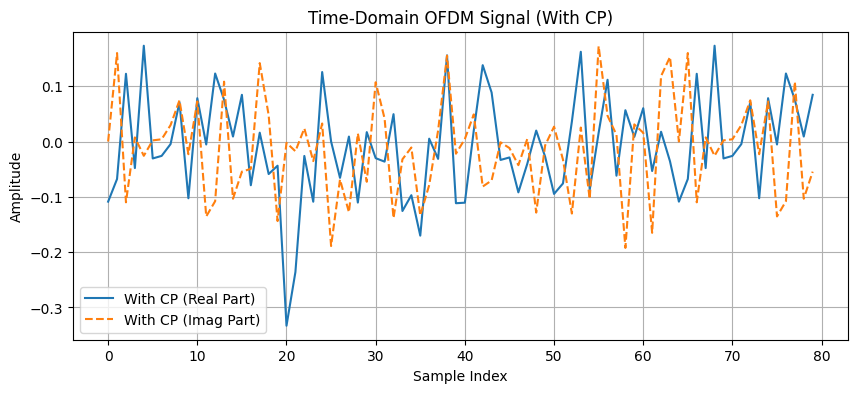

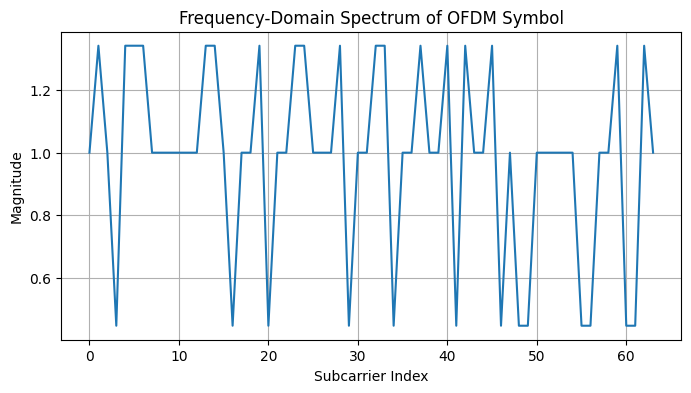

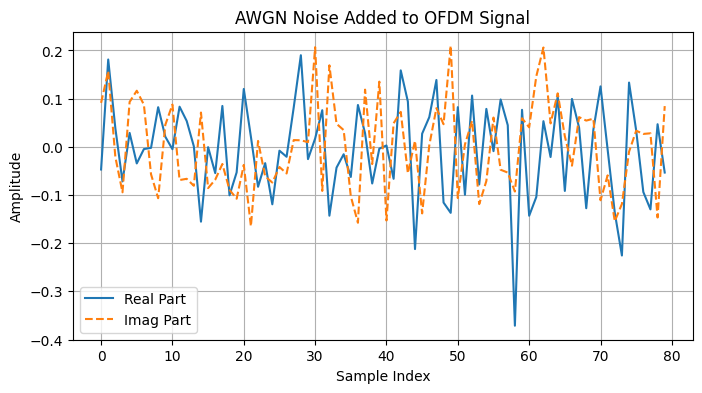

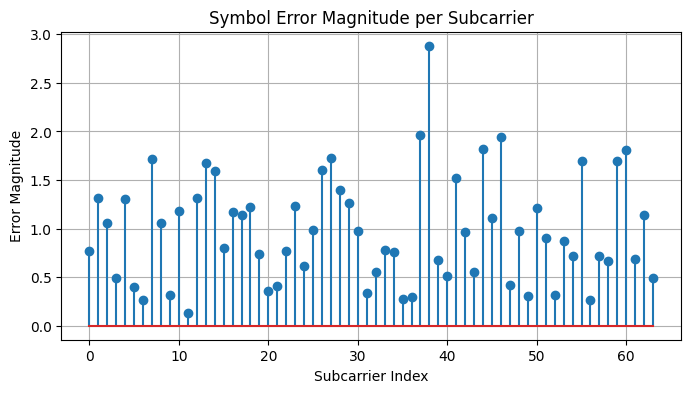

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Create folder to save plots
os.makedirs("plots", exist_ok=True)

# Parameters
N = 64          # Number of subcarriers
cp_len = 16     # Cyclic Prefix length
qam_order = 16  # 16-QAM

# Generate random data
data = np.random.randint(0, qam_order, N)

# QAM Modulation (simple 16-QAM mapping)
symbols = np.sqrt(1/10) * (2*(data//4)-3 + 1j*(2*(data%4)-3))

# IFFT: OFDM modulation
ifft_data = np.fft.ifft(symbols)

# Add Cyclic Prefix
tx_signal = np.hstack([ifft_data[-cp_len:], ifft_data])

# Channel: Add AWGN noise
noise = 0.1 * (np.random.randn(len(tx_signal)) + 1j*np.random.randn(len(tx_signal)))
rx_signal = tx_signal + noise

# Remove CP and apply FFT
rx_no_cp = rx_signal[cp_len:]
rx_fft = np.fft.fft(rx_no_cp)

# Compare transmitted vs received symbols
error = np.abs(symbols - rx_fft)
print("Mean error:", np.mean(error))

# Plot 1: Constellation Diagram
plt.figure(figsize=(6,6))
plt.scatter(rx_fft.real, rx_fft.imag, color='blue', label='Received')
plt.scatter(symbols.real, symbols.imag, color='red', marker='x', label='Transmitted')
plt.grid(True)
plt.legend()
plt.title("OFDM Constellation: Transmitted vs Received")
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.savefig("plots/constellation.png")
plt.show()

# Plot 2: Time-Domain OFDM Symbol (Before CP)
plt.figure(figsize=(10,4))
plt.plot(np.real(ifft_data), label='OFDM Symbol (Real Part)')
plt.plot(np.imag(ifft_data), label='OFDM Symbol (Imag Part)', linestyle='--')
plt.title("Time-Domain OFDM Symbol (Before CP)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.savefig("plots/time_domain_before_cp.png")
plt.show()

# Plot 3: Time-Domain OFDM Signal (With CP)
plt.figure(figsize=(10,4))
plt.plot(np.real(tx_signal), label='With CP (Real Part)')
plt.plot(np.imag(tx_signal), label='With CP (Imag Part)', linestyle='--')
plt.title("Time-Domain OFDM Signal (With CP)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.savefig("plots/time_domain_with_cp.png")
plt.show()

# Plot 4: Frequency-Domain Spectrum
spectrum = np.fft.fftshift(np.fft.fft(ifft_data))
plt.figure(figsize=(8,4))
plt.plot(np.abs(spectrum))
plt.title("Frequency-Domain Spectrum of OFDM Symbol")
plt.xlabel("Subcarrier Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.savefig("plots/spectrum.png")
plt.show()

# Plot 5: AWGN Noise Visualization
plt.figure(figsize=(8,4))
plt.plot(np.real(noise), label='Real Part')
plt.plot(np.imag(noise), label='Imag Part', linestyle='--')
plt.title("AWGN Noise Added to OFDM Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.savefig("plots/noise.png")
plt.show()

# Plot 6: Symbol Error Magnitude per Subcarrier
plt.figure(figsize=(8,4))
plt.stem(error)
plt.title("Symbol Error Magnitude per Subcarrier")
plt.xlabel("Subcarrier Index")
plt.ylabel("Error Magnitude")
plt.grid(True)
plt.savefig("plots/error_magnitude.png")
plt.show()

## Simulation Results and Interpretation

- **Constellation Plot**: Shows transmitted vs received symbols. Noise causes slight scatter around ideal points.
- **Time-Domain Plots**: Visualize OFDM symbol before and after adding CP.
- **Frequency Spectrum**: Confirms energy spread across subcarriers.
- **Noise Plot**: Real and imaginary components of AWGN.
- **Error Plot**: Symbol-wise deviation due to channel noise.

### Mean Error:
Displayed in the output — helps quantify distortion introduced by the channel.